In [26]:
print("this is my first ML project")

this is my first ML project


In [27]:
import pandas as pd

data = pd.read_csv("dataset/diabetes.csv")
data.head()
data.isnull().sum()
data.describe()
data.duplicated().sum()

0

In [28]:
from sklearn.model_selection import train_test_split
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

r_s = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=r_s)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)

/home/ratah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, test_pred)
print("Regression logistique accuracy:", accuracy)

Regression logistique accuracy: 0.7467532467532467


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=r_s)
rf_model.fit(X_train, y_train)  
rf_test_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_test_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7662337662337663


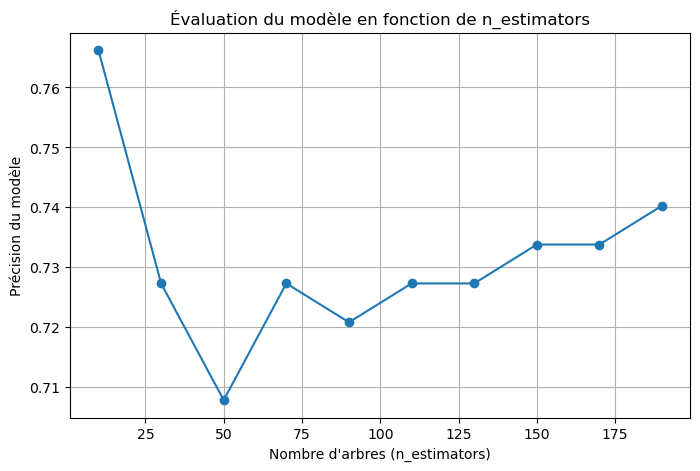

In [32]:
import matplotlib.pyplot as plt
n_values = list(range(10, 210, 20))   # 10, 30, 50, ..., 190
accuracy_scores = []

for n in n_values:
    model = RandomForestClassifier(n_estimators=n, random_state=r_s)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)

# 4. Tracer le graphique
plt.figure(figsize=(8,5))
plt.plot(n_values, accuracy_scores, marker='o')
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Précision du modèle")
plt.title("Évaluation du modèle en fonction de n_estimators")
plt.grid(True)
plt.show()